In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [2]:
sA = sp.Symbol('A')
sB = sp.Symbol('B')
sC = sp.Symbol('C')
sk1 = sp.Symbol('k1')
sk2 = sp.Symbol('k2')

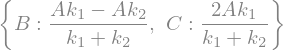

In [3]:
sp.solve((sA + sB - sC, sA - sB - sk2 / sk1 * sC), (sB, sC))

In [4]:
def k(E, V, h = 1, m = 1):
    return np.sqrt(2 * m * (E - V) / h**2)

In [5]:
def psiA(x, t, E, A, h = 1, m = 1):
    return A * np.exp(1j * k(E, 0) * x) * np.exp(-1j * E * t / h)

In [6]:
def psiB(x, t, E, A, V0, h = 1, m = 1):
    return A * np.exp(-1j * k(E, 0) * x) * np.exp(-1j * E * t / h) * (k(E, 0) - k(E, V0)) / (k(E, 0) + k(E, V0))

In [7]:
def psiC(x, t, E, A, V0, h = 1, m = 1):
    return 2 * A * np.exp(1j * k(E, V0) * x) * np.exp(-1j * E * t / h) * k(E, 0) / (k(E, 0) + k(E, V0))

In [13]:
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (-3, 3))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
line3, = ax.plot([], [], lw = 2)
line4, = ax.plot([], [], lw = 2)
dt = 0.01
xsl = np.linspace(-5, 0, 1000)
xsr = np.linspace(0, 5, 1000)

E = 1.01
V0 = 1
A = 1

T = np.pi * 2 / E

plt.close()

def animate(i):
    line1.set_data(xsl, psiA(xsl, dt * i, E, A).real)
    #line2.set_data(xsl, psiA(xsl, dt * i, E, A).real + psiB(xsl, dt * i, E, A, V0).real)
    line2.set_data(xsl, psiB(xsl, dt * i, E, A, V0).real)    
    line3.set_data(xsr, psiC(xsr, dt * i, E, A, V0).real)
    
    return line1, line2, line3, 

anim = animation.FuncAnimation(fig, animate, frames=int(T / dt), interval=20, blit=True)
HTML(anim.to_html5_video())

In [14]:
def coswave(x, t, k, w):
    return np.cos(k * x - w(k) * t)

$$v_g = \frac{\partial \omega}{\partial k}$$

In [20]:
fig = plt.figure()
ax = plt.axes(xlim = (-10, 10), ylim = (-4, 4))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)

dt = 0.01

plt.close()

xs = np.linspace(-11, 11, 1000)

w = lambda k: k**2

def animate(i):
    
    line1.set_data(xs, coswave(xs, dt * i, 8, w) + coswave(xs, dt * i, 9, w) + coswave(xs, dt * i, 10, w))
    return line1, 

anim = animation.FuncAnimation(fig, animate, 800, interval=20, blit=True)
HTML(anim.to_html5_video())

KeyboardInterrupt: 

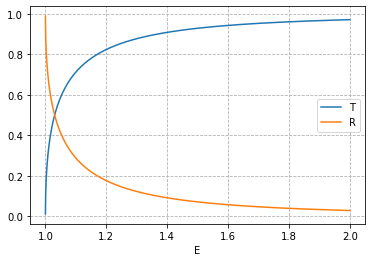

In [28]:
Es = np.linspace(1.00001, 2, 1000)
plt.grid(ls = '--')
plt.plot(Es, 4 * k(Es, 0) * k(Es, V0) / (k(Es, 0) + k(Es, V0))**2, label = 'T')
plt.plot(Es, (k(Es, 0) - k(Es, V0))**2 / (k(Es, 0) + k(Es, V0))**2, label = 'R')
plt.xlabel('E')
plt.legend()

In [36]:
sx = sp.Symbol('x', real = True)
st = sp.Symbol('t', real = True)
sk = sp.Symbol('k', real = True)
sw = sp.Symbol('omega', real = True)
sh = sp.Symbol('hbar', real = True)
sm = sp.Symbol('m', real = True)
sA = sp.Symbol('A')

In [30]:
def j(Psi):
    return sh / (2 * sm * sp.I) * (Psi.conjugate()*Psi.diff(sx) - Psi.conjugate().diff(sx)*Psi)

In [37]:
PsiA = sA * sp.exp(sp.I * sk * sx - sp.I * sw * st)
PsiA

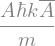

In [39]:
j(PsiA).simplify()